
Task 1: Exploratory Data Analysis (EDA) and Business Insights

Regional Distribution (%):
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64
Customer Signups Over Years:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64
Top Product Categories by Sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
Top Regions by Total Sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
Average Order Value (USD): 272.55


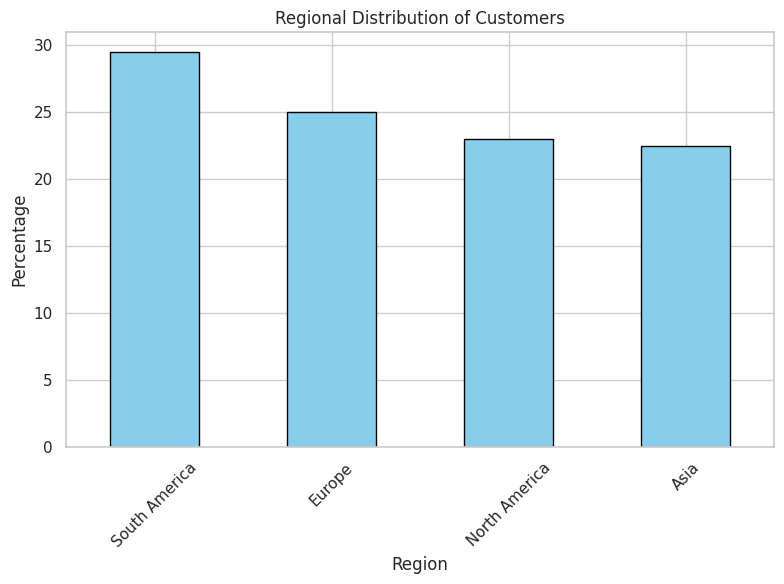

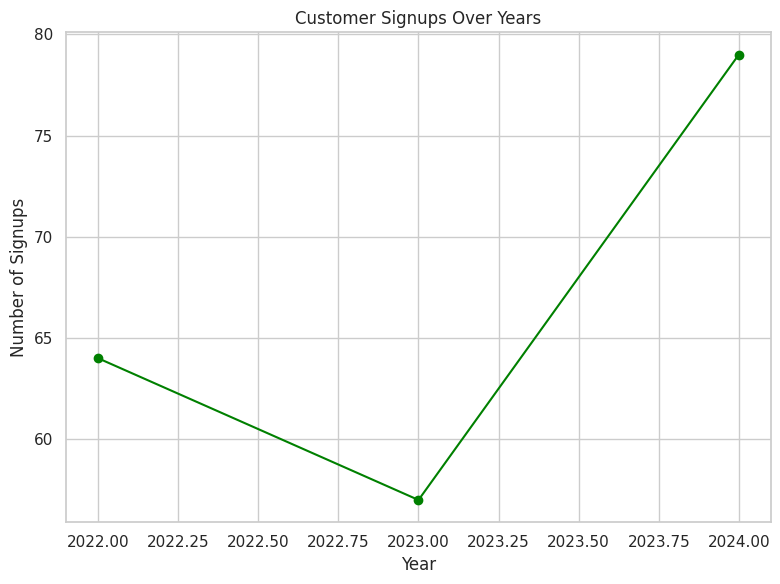

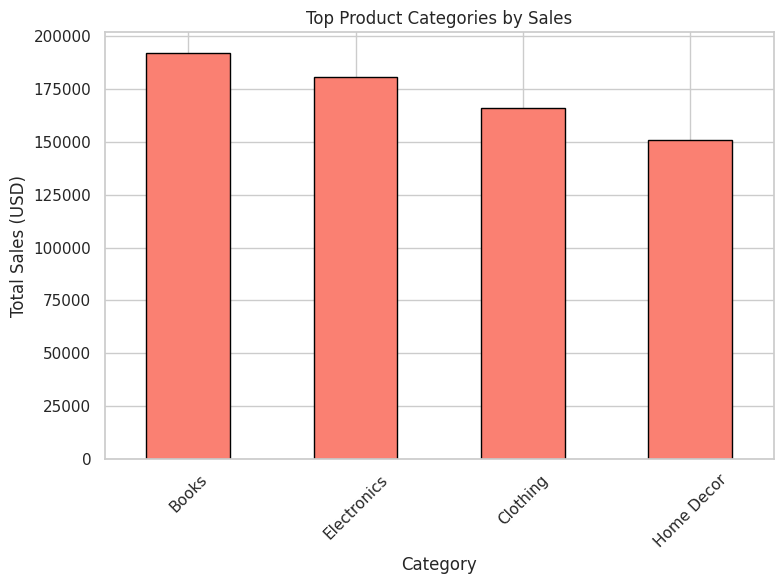

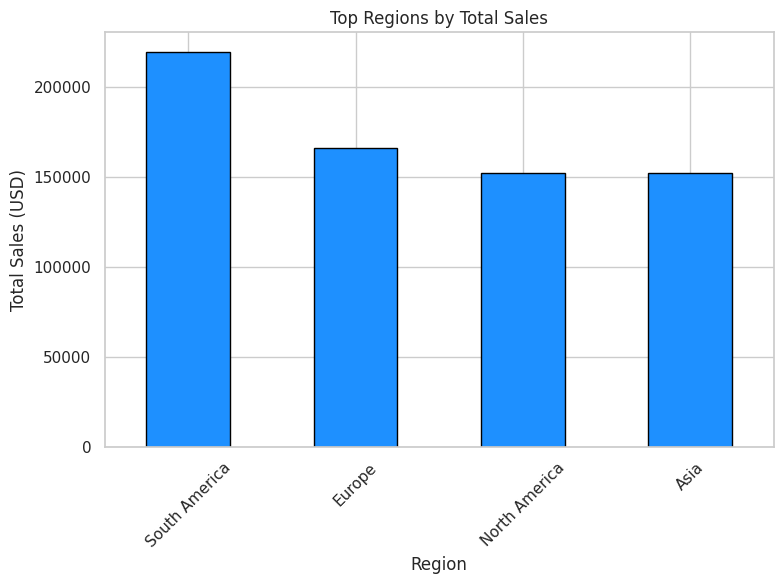

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# 1. Regional Distribution of Customers
regional_distribution = customers_df['Region'].value_counts(normalize=True) * 100
print("Regional Distribution (%):")
print(regional_distribution)

# 2. Customer Signups Over Time
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()
print("Customer Signups Over Years:")
print(signup_trends)

# 3. Top Product Categories by Sales
merged_df = transactions_df.merge(products_df, on='ProductID', how='left')
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Top Product Categories by Sales:")
print(category_sales)

# 4. Top Regions by Total Sales
region_sales = merged_df.merge(customers_df, on='CustomerID', how='left').groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Top Regions by Total Sales:")
print(region_sales)

# 5. Average Order Value (AOV)
merged_df['AOV'] = merged_df['TotalValue'] / merged_df['Quantity']
average_order_value = merged_df['AOV'].mean()
print(f"Average Order Value (USD): {average_order_value:.2f}")

# Visualizations
sns.set(style="whitegrid")

# Regional Distribution Bar Plot
plt.figure(figsize=(8, 6))
regional_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Regional Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Signups Over Time Line Plot
plt.figure(figsize=(8, 6))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signups Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top Product Categories by Sales Bar Plot
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top Product Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Regions by Total Sales Bar Plot
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Top Regions by Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
